<a href="https://colab.research.google.com/github/Puru35/Sarcasm-Detection-using-NLP/blob/master/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction and Problem Statement

This project is based on the dataset present on kaggle, the link of which is given below:

Link to the dataset: [News Headlines dataset for Sarcasm detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection)

This link contains 2 similar datasets, of which we will be using 1 of them. The data contains 3 attributes:

1. is_sarcastic: Whether the given headline is sarcastic(1) or not(0).
2. headline: This is the actual headline that we need to categorize as sarcastic or not.
3. article_link: This is the link to the respective newspaper article.

We need to find out if the given headline is sarcastic or not, using Natural Language Processing techniques.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Importing the Data set.

I will be importing only the version 2 of this dataset. I will explain why in the conclusion.

In [0]:
Data =  pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [35]:
Data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


as we can see, the article link feature is not needed, as we might as well drop it.

In [0]:
Data = Data.drop(["article_link"], axis = 1).reindex(columns = ["headline","is_sarcastic"])

In [37]:
Data

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1
...,...,...
28614,jews to celebrate rosh hashasha or something,1
28615,internal affairs investigator disappointed con...,1
28616,the most beautiful acceptance speech this week...,0
28617,mars probe destroyed by orbiting spielberg-gat...,1


Let us now check whether there are any NaN values in our dataset.

In [6]:
print(Data.isna().sum())

headline        0
is_sarcastic    0
dtype: int64


## Model Training

Now, instead of only following the normal procedure of tokenization and lemmatization, we will train 2 different models, one wher our data is tokenized and lemmatized, and one where it isn't. We will see why below.

### Tokenized and lemmatized data

First let's remove unnecessary punctuation marks that are present, such as commas, colons, anything which is not a word.


In [0]:
Data['headline']=Data['headline'].str.lower().apply(lambda x: re.sub(r'[^\w\s]',' ',x)).apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [8]:
Data.head(15)

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep totally nails why congress is falling ...,0
2,eat your veggies deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word stream...,1
5,my white inheritance,0
6,ways to file your taxes with less stress,0
7,richard branson global warming donation nearly...,1
8,shadow government getting too large to meet in...,1
9,lots of parents know this scenario,0


Our Data now is only filled with words, without any punctuation.

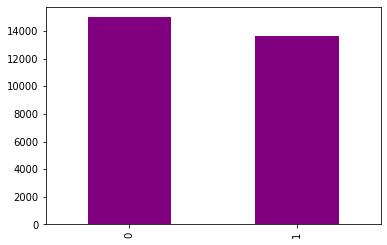

In [9]:
Data['is_sarcastic'].value_counts().plot.bar(color = 'purple', figsize = (6, 4))

We can see that there are more number of non sarcastic comments than sarcastic ones.

In [0]:
from nltk.tokenize import word_tokenize
# Creating token for the clean tweets
Data['Tokenized'] = Data['headline'].apply(lambda x: word_tokenize(x))

Now on our cleaned dataset, we can apply tokenization, to get a list of words in each row.


In [11]:
Data

,headline,is_sarcastic,Tokenized
0,thirtysomething scientists unveil doomsday clo...,1,"[thirtysomething, scientists, unveil, doomsday..."
1,dem rep totally nails why congress is falling ...,0,"[dem, rep, totally, nails, why, congress, is, ..."
2,eat your veggies deliciously different recipes,0,"[eat, your, veggies, deliciously, different, r..."
3,inclement weather prevents liar from getting t...,1,"[inclement, weather, prevents, liar, from, get..."
4,mother comes pretty close to using word stream...,1,"[mother, comes, pretty, close, to, using, word..."
...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,"[jews, to, celebrate, rosh, hashasha, or, some..."
28615,internal affairs investigator disappointed con...,1,"[internal, affairs, investigator, disappointed..."
28616,the most beautiful acceptance speech this week...,0,"[the, most, beautiful, acceptance, speech, thi..."
28617,mars probe destroyed by orbiting spielberg gat...,1,"[mars, probe, destroyed, by, orbiting, spielbe..."


In [12]:
Data["Tokenized"]

0        [thirtysomething, scientists, unveil, doomsday...
1        [dem, rep, totally, nails, why, congress, is, ...
2        [eat, your, veggies, deliciously, different, r...
3        [inclement, weather, prevents, liar, from, get...
4        [mother, comes, pretty, close, to, using, word...
                               ...                        
28614    [jews, to, celebrate, rosh, hashasha, or, some...
28615    [internal, affairs, investigator, disappointed...
28616    [the, most, beautiful, acceptance, speech, thi...
28617    [mars, probe, destroyed, by, orbiting, spielbe...
28618              [dad, clarifies, this, not, food, stop]
Name: Tokenized, Length: 28619, dtype: object

Now that we have finished tokenization, let's remove all the stop words such as "the", "to", etc. The stop words that I have implemented here have been imported from the nltk library, basen on the corpus of the englsih language.

In [0]:
stop_words = set(stopwords.words('english'))

In [14]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [0]:
Data['Tokenized'] = Data['Tokenized'].apply(lambda x: [word for word in x if not word in stop_words])

In [16]:
Data

,headline,is_sarcastic,Tokenized
0,thirtysomething scientists unveil doomsday clo...,1,"[thirtysomething, scientists, unveil, doomsday..."
1,dem rep totally nails why congress is falling ...,0,"[dem, rep, totally, nails, congress, falling, ..."
2,eat your veggies deliciously different recipes,0,"[eat, veggies, deliciously, different, recipes]"
3,inclement weather prevents liar from getting t...,1,"[inclement, weather, prevents, liar, getting, ..."
4,mother comes pretty close to using word stream...,1,"[mother, comes, pretty, close, using, word, st..."
...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,"[jews, celebrate, rosh, hashasha, something]"
28615,internal affairs investigator disappointed con...,1,"[internal, affairs, investigator, disappointed..."
28616,the most beautiful acceptance speech this week...,0,"[beautiful, acceptance, speech, week, came, qu..."
28617,mars probe destroyed by orbiting spielberg gat...,1,"[mars, probe, destroyed, orbiting, spielberg, ..."


If we compare this dataframe to the previous one, we see that all unnecessary words that were present have been removed from the list in each row.

Let us now apply Lemmatization, to bring all the words to their base lemma. We will be using Word Net Lemmatizer here.

In [0]:
lemmatizer = WordNetLemmatizer() 


In [0]:
Data['Lemmatized'] = Data['Tokenized'].apply(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x]))

In [19]:
Data

,headline,is_sarcastic,Tokenized,Lemmatized
0,thirtysomething scientists unveil doomsday clo...,1,"[thirtysomething, scientists, unveil, doomsday...",thirtysomething scientist unveil doomsday cloc...
1,dem rep totally nails why congress is falling ...,0,"[dem, rep, totally, nails, congress, falling, ...",dem rep totally nail congress falling short ge...
2,eat your veggies deliciously different recipes,0,"[eat, veggies, deliciously, different, recipes]",eat veggie deliciously different recipe
3,inclement weather prevents liar from getting t...,1,"[inclement, weather, prevents, liar, getting, ...",inclement weather prevents liar getting work
4,mother comes pretty close to using word stream...,1,"[mother, comes, pretty, close, using, word, st...",mother come pretty close using word streaming ...
...,...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,"[jews, celebrate, rosh, hashasha, something]",jew celebrate rosh hashasha something
28615,internal affairs investigator disappointed con...,1,"[internal, affairs, investigator, disappointed...",internal affair investigator disappointed cons...
28616,the most beautiful acceptance speech this week...,0,"[beautiful, acceptance, speech, week, came, qu...",beautiful acceptance speech week came queer ko...
28617,mars probe destroyed by orbiting spielberg gat...,1,"[mars, probe, destroyed, orbiting, spielberg, ...",mar probe destroyed orbiting spielberg gate sp...


We see that the new attribute "Lemmatized" contains strings that make no sense, but now contain only the important words of each original sentence.

In [0]:
from wordcloud import WordCloud

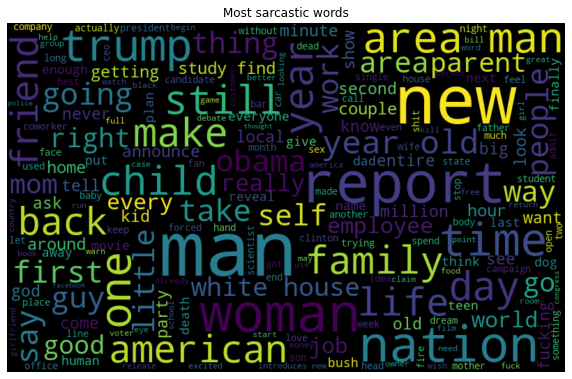

In [22]:
normal_words =' '.join([text for text in Data['Lemmatized'][Data['is_sarcastic'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most sarcastic words")
plt.show()

Here we can see a clear image of which major words are sarcastic in this dataset.

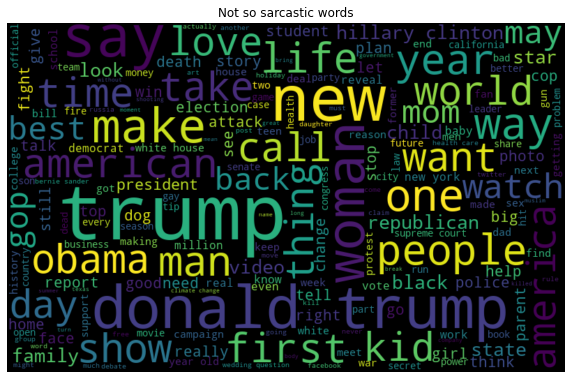

In [23]:
normal_words =' '.join([text for text in Data['Lemmatized'][Data['is_sarcastic'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Not so sarcastic words")
plt.show()

We can also see the most used words that are not sarcastic. Notice how most of the words actually repeat, in both cases.

We will now use TFIDF vectorizing to fit and transform the lemmatized data to a bag-of-words model. This creates a vocabulary on which we can work.

In [24]:
tfidf = TfidfVectorizer()

tfidf.fit(Data['Lemmatized'].values)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
target = np.array(Data['is_sarcastic'])

bag= tfidf.transform(Data['Lemmatized'].values).toarray()

In [28]:
print(bag.shape)
print(bag)

(28619, 23020)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


We can see that the bag contains 28,619 rows, the same as the data frame, but has 23,020 unique words in total. This is a really big dimension to work on. So we will make use of Truncated SVD to help us in dimensionality reduction, so as to get a densely populated matrix rather than a sparse one. After that we can finally train our model, using keras.

In [35]:
tsvd = TruncatedSVD(n_components=50)
scaled = tsvd.fit(bag).transform(bag)
print(scaled.shape)

(28619, 50)


In [0]:
model = keras.models.Sequential([
        keras.layers.Dense(38, input_shape=(50,), activation='relu'),
        keras.layers.Dense(18, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [38]:
model.fit(scaled, target, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
716/716 - 1s - loss: 0.6884 - accuracy: 0.5660 - val_loss: 0.6832 - val_accuracy: 0.5709
Epoch 2/50
716/716 - 1s - loss: 0.6765 - accuracy: 0.5880 - val_loss: 0.6665 - val_accuracy: 0.6193
Epoch 3/50
716/716 - 1s - loss: 0.6558 - accuracy: 0.6227 - val_loss: 0.6430 - val_accuracy: 0.6466
Epoch 4/50
716/716 - 1s - loss: 0.6333 - accuracy: 0.6411 - val_loss: 0.6231 - val_accuracy: 0.6473
Epoch 5/50
716/716 - 1s - loss: 0.6180 - accuracy: 0.6510 - val_loss: 0.6126 - val_accuracy: 0.6509
Epoch 6/50
716/716 - 1s - loss: 0.6098 - accuracy: 0.6560 - val_loss: 0.6074 - val_accuracy: 0.6578
Epoch 7/50
716/716 - 1s - loss: 0.6055 - accuracy: 0.6571 - val_loss: 0.6063 - val_accuracy: 0.6565
Epoch 8/50
716/716 - 1s - loss: 0.6033 - accuracy: 0.6625 - val_loss: 0.6034 - val_accuracy: 0.6595
Epoch 9/50
716/716 - 1s - loss: 0.6017 - accuracy: 0.6652 - val_loss: 0.6026 - val_accuracy: 0.6590
Epoch 10/50
716/716 - 1s - loss: 0.6007 - accuracy: 0.6654 - val_loss: 0.6018 - val_accuracy: 0.6606

We see that we get a validation loss of 0.5837, and a validation accuracy of almost 68%, by training for 50 epochs. Any more and it would start to deviate too much.

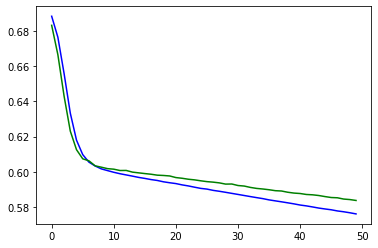

In [39]:
plt.plot(model.history.epoch, model.history.history['loss'],'b',
         model.history.epoch, model.history.history['val_loss'], 'g')

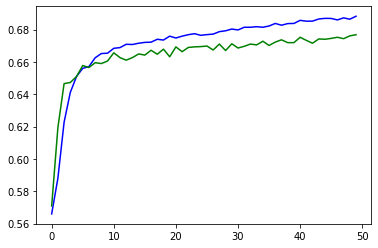

In [40]:
plt.plot(model.history.epoch, model.history.history['accuracy'],'b',
         model.history.epoch, model.history.history['val_accuracy'], 'g')

As we can see in the above graphs, the Loss and Accuracy graphs do not deviate much, so it's safe to assume we have not overtrained our model.

### Original Data

Now, we shall work directly on our original dataset. The final model training process remains the same as the previous one.

In [7]:
tfidf = TfidfVectorizer()

tfidf.fit(Data['headline'].values)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
target = np.array(Data['is_sarcastic'])

bag= tfidf.transform(Data['headline'].values).toarray()

In [9]:
bag.shape

(28619, 26336)

In [10]:
tsvd = TruncatedSVD(n_components=50)
scaled = tsvd.fit(bag).transform(bag)
print(scaled.shape)

(28619, 50)


In [0]:
model = keras.models.Sequential([
        keras.layers.Dense(38, input_shape=(50,), activation='relu'),
        keras.layers.Dense(18, activation='tanh'),
        keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.0001),
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [23]:
model.fit(scaled, target, epochs=90, verbose=1, validation_split=0.2)

Epoch 1/90
716/716 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.6052 - val_loss: 0.6573 - val_accuracy: 0.6579
Epoch 2/90
716/716 [==============================] - 1s 2ms/step - loss: 0.6243 - accuracy: 0.7028 - val_loss: 0.5841 - val_accuracy: 0.7442
Epoch 3/90
716/716 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7430 - val_loss: 0.5240 - val_accuracy: 0.7542
Epoch 4/90
716/716 [==============================] - 1s 2ms/step - loss: 0.5154 - accuracy: 0.7533 - val_loss: 0.5006 - val_accuracy: 0.7607
Epoch 5/90
716/716 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.7575 - val_loss: 0.4931 - val_accuracy: 0.7622
Epoch 6/90
716/716 [==============================] - 1s 2ms/step - loss: 0.4981 - accuracy: 0.7576 - val_loss: 0.4910 - val_accuracy: 0.7587
Epoch 7/90
716/716 [==============================] - 1s 2ms/step - loss: 0.4961 - accuracy: 0.7580 - val_loss: 0.4892 - val_accuracy: 0.7615
Epoch 

After training the model, we observe that we get a validation accuracy of little over 77%. This is better than the one we got in the previous model, even though we applied tokenization and lemmatization.

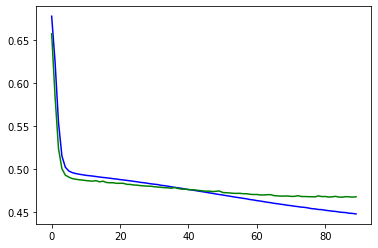

In [24]:
plt.plot(model.history.epoch, model.history.history['loss'],'b',
         model.history.epoch, model.history.history['val_loss'], 'g')

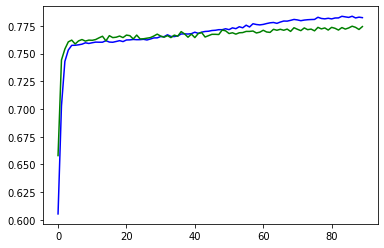

In [25]:
plt.plot(model.history.epoch, model.history.history['accuracy'],'b',
         model.history.epoch, model.history.history['val_accuracy'], 'g')

When we see the graphs as well, we observe that there is very little deviation, which means that our model is well trained.

## Summary and Conclusion

After training both models, we see that the one which used data without much cleaning and pre-processing, gave a better result than the model which did. The takeaway that I took from this is that in some way, both punctuations and the stop words had a small positive effect on the training model, which is true in many cases. most sarcastic sentences do stress on a few stop words like "the", "your", etc.

We also saw during the Word Cloud visualization that most used words that were sarcastic, were present in the non-sarcastic graph too. Again, my takeaway is that sarcasm is based on the context of the situation. One sentence that may be sarcastic in one way, may be an actual fact in another context, especially in the case of newspaper headlines, whch is what this dataset is based on.

So keeping that in mind, I can understand why the model trained on the normal data gave a better accuracy than the one trained on the cleaned data. Due to my limited resources, I was not able to work on both The data files present, but will updated as soon as I can. Below is a dataframe that contains the the original data, along with the predicted classes, so as to compare whether they are same or not.

In [44]:
pd.concat([Data,pd.DataFrame(model.predict_classes(scaled), columns = ["Predicted value"])], axis = 1).head(25)

,headline,is_sarcastic,Predicted value
0,thirtysomething scientists unveil doomsday clo...,1,1
1,dem rep. totally nails why congress is falling...,0,0
2,eat your veggies: 9 deliciously different recipes,0,0
3,inclement weather prevents liar from getting t...,1,1
4,mother comes pretty close to using word 'strea...,1,1
5,my white inheritance,0,0
6,5 ways to file your taxes with less stress,0,0
7,richard branson's global-warming donation near...,1,1
8,shadow government getting too large to meet in...,1,1
9,lots of parents know this scenario,0,0
